In [13]:
# %load ../compat/jupyter_compat.py
import os

import cv2
import numpy
import PIL.Image

from IPython import display
from urllib.request import urlopen


def cv2_imshow(winname, mat):
    mat = mat.clip(0, 255).astype('uint8')
    if mat.ndim == 3:
        if mat.shape[2] == 4:
            mat = cv2.cvtColor(mat, cv2.COLOR_BGRA2RGBA)
        else:
            mat = cv2.cvtColor(mat, cv2.COLOR_BGR2RGB)
    display.display(PIL.Image.fromarray(mat))

cv2.imshow = cv2_imshow


def cv2_waitKey(delay=0):
    return -1

cv2.waitKey = cv2_waitKey


def cv2_imread(filename, flags=cv2.IMREAD_COLOR):
    if os.path.exists(filename):
        image = cv2._imread(filename, flags)
    else:
        url = f'https://github.com/PacktPublishing/Learning-OpenCV-5-Computer-Vision-with-Python-Fourth-Edition/raw/main/*/{filename}'
        resp = urlopen(url)
        image = numpy.asarray(bytearray(resp.read()), dtype='uint8')
        image = cv2.imdecode(image, flags)
    return image

# Cache the original implementation of `imread`, if we have not already
# done so on a previous run of this cell.
if '_imread' not in dir(cv2):
    cv2._imread = cv2.imread

cv2.imread = cv2_imread


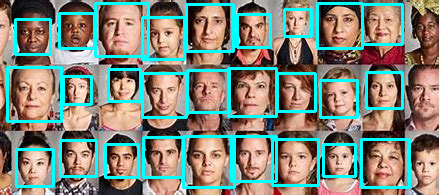

-1

In [19]:
face_cascade = cv2.CascadeClassifier(f'{cv2.data.haarcascades}haarcascade_frontalface_default.xml')
#with open(f'{cv2.data.haarcascades}haarcascade_frontalface_default.xml', mode='r')as f:
    #for i in f.readlines():
        #print(i)
img = cv2.imread('./pictures/faces.jfif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.08, 5)
for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 0), 2)
  
cv2.imshow('Detected!', img)
#cv2.imwrite( img)
cv2.waitKey(0)


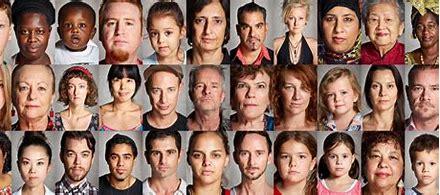

In [20]:
face_cascade = cv2.CascadeClassifier(
    f'{cv2.data.haarcascades}haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(
    f'{cv2.data.haarcascades}haarcascade_eye.xml')

frame = cv2.imread('./pictures/faces.jfif')
   
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5, minSize=(120, 120))
for (x, y, w, h) in faces:
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.11, 5, minSize=(40, 40))
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(frame, (x+ex, y+ey),(x+ex+ew, y+ey+eh), (0, 255, 0), 2)
cv2.imshow('Face Detection', frame)